<a href="https://colab.research.google.com/github/maryembenghouma/Data-science-Projects/blob/main/Copie_de_ProjetMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I-Business Understanding :

1-Objective:

The main objective of an Intrusion Detection System (IDS) is to protect the network from malicious events. Given the increasing variety of cyber attacks, traditional firewalls may not suffice to safeguard the network. Hence, an IDS is crucial to preventing novel attacks that can make the system more vulnerable.

2-Business Problem:

The challenge lies in :

-Detecting and preventing both known and unknown malicious activities.
-Enhancing the network's security posture.

3-Data Mining Goals:

- Develop predictive models to identify signatures or specific patterns indicative of known attacks (Signature-based IDS).
- Implement machine learning techniques for anomaly-based IDS, capable of recognizing unknown attacks by comparing current real-time traffic to previously recorded malicious-free traffic.

4-Success Criteria:

Evaluate intrusion detection models based on accuracy, precision, recall, F-score, and overall model accuracy.

5-Identify business :

-Affordable to deploy and maintain.
-Easy to integrate with existing network infrastructure.
-Compliant with data privacy regulations.


6-Data requirements:

-Labeled with attack types.
-Preprocessed to remove noise and irrelevant features.
-Representative of real-world network traffic patterns.


7-Assess business risks:

-Fail to detect all network attacks.
-Generate too many false positives.
-Be vulnerable to attacks itself.

8-Types of IDS:

- Signature-based IDS:
 -Identifies known attack signatures or specific patterns.
 -Effective for known attacks with minimal false alarms.


-  Anomaly-based IDS:
Uses machine learning to analyze real-time traffic against recorded malicious-free traffic.
Effective for recognizing unknown attacks but may have higher false negatives.
Widely used due to its capability to handle novel threats.


Key Deliverables:

At the end of the project, our primary goal is to provide robust intrusion detection systems (IDS) that have been developed and evaluated with the aim of enhancing the security of computer networks. The focus is on effectively identifying and classifying various types of network attacks to mitigate potential risks and safeguard against malicious activities.


---



# II-Data Understanding :

To do the Data Understanding we first need to import the dataset and add the features to each column

In [ ]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate','xAttack','DifficultyLevel']

We will create a dictionary for each group of attack having a unique key which is the main attack class

In [ ]:
attack_classes = {
    'normal': 'normal',
    'dos': 'neptune, back, land, pod, smurf, teardrop, mailbomb, apache2, processtable, udpstorm, worm',
    'u2r': 'buffer_overflow, loadmodule, perl, rootkit, ps, sqlattack, xterm',
    'r2l': 'ftp_write, guess_passwd, imap, multihop, phf, spy, warezclient, warezmaster, sendmail, named, snmpgetattack, snmpguess, xlock, xsnoop, httptunnel',
    'probe': 'ipsweep, nmap, portsweep, satan, mscan, saint'
}

attack_classes = {key: value.strip().split(', ') for key, value in attack_classes.items()}
attacks_types = {attack: attack_type for attack_type, attacks in attack_classes.items() for attack in attacks}

We will now import our training data and our testing data and then we will create a new column called Attack Type containing the main class associated to each sub attack




In [ ]:

Data=pd.read_csv('KDDTrain+.csv',names = columns)
test=pd.read_csv('KDDTrain+_20Percent.csv',names = columns)
unique_values = Data['xAttack'].unique()
test.head()


<ipython-input-34-c8d2913660e1>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  Data=pd.read_csv('KDDTrain+.csv',names = columns)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack,DifficultyLevel
0,cp,http,SF,323,306,0,0,0,0,0,...,0.00,0.00,0.02,0.0,0.01,0.0,0.0,normal,21,NaN
1,0,tcp,http,SF,256,1151,0,0,0,0,...,1.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,normal,21.0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.08,0.00,0.0,1.00,1.0,0.0,0.00,neptune,21.0
3,0,udp,other,SF,146,0,0,0,0,0,...,0.01,0.69,0.95,0.0,0.00,0.0,0.0,0.00,normal,21.0
4,0,tcp,smtp,SF,2612,331,0,0,0,0,...,0.60,0.01,0.00,0.0,0.00,0.0,0.0,0.00,normal,20.0


In [ ]:
Data['Attack Type'] = Data.xAttack.apply(lambda r: attacks_types[r.strip().lower()])
test['Attack Type'] = test.xAttack.apply(lambda r: attacks_types[r.strip().lower()])

AttributeError: ignored

In [ ]:
Data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack,DifficultyLevel
0,NaN,0.00,0.01,0.00,0.41,0.0,smurf,17,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,tcp,gopher,REJ,0.00,0.0,0,0,0.0,0.0,...,0.04,0.06,0.00,0.0,0.0,0.0,1.0,1.0,neptune,19.0
2,0.0,tcp,private,S0,0.00,0.0,0,0,0.0,0.0,...,0.04,0.06,0.00,0.0,1.0,1.0,0.0,0.0,neptune,21.0
3,0.0,tcp,http,SF,247.00,1656.0,0,0,0.0,0.0,...,1.00,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal,21.0
4,0.0,tcp,private,S0,0.00,0.0,0,0,0.0,0.0,...,0.04,0.07,0.00,0.0,1.0,1.0,0.0,0.0,neptune,21.0




> **We now can see that our dataset contains 125973 lines , with 4 (5 with the attack type) categorical variables and 39 numerical features ( 15 of float type and 24 of integer type)**



In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 



 > **We provide here a summary of the dataset for each numerical column showing the amount of non null variable , the average mean of each one , the standard deviation , the min and max and finally the 3 quartiles of each columns**






In [ ]:
Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,DifficultyLevel
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000




> **We can see here that our dataset doesn't contain empty rows or columns**



In [ ]:
Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
# Finding categorical features
num_cols = Data._get_numeric_data().columns

cate_cols = list(set(Data.columns)-set(num_cols))
cate_cols.remove('xAttack')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'flag', 'service']

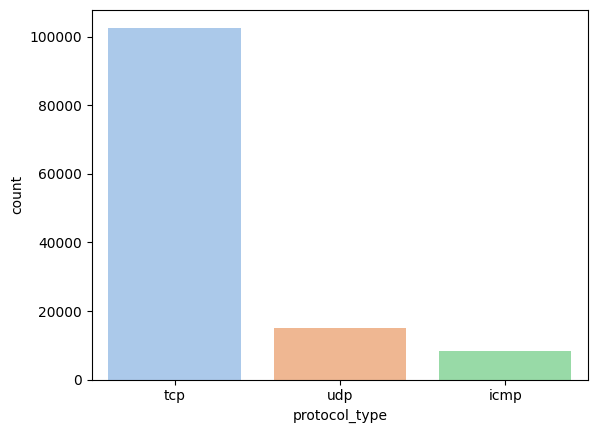

In [ ]:
sns.countplot(x="protocol_type",data=Data,palette="pastel")
plt.show()

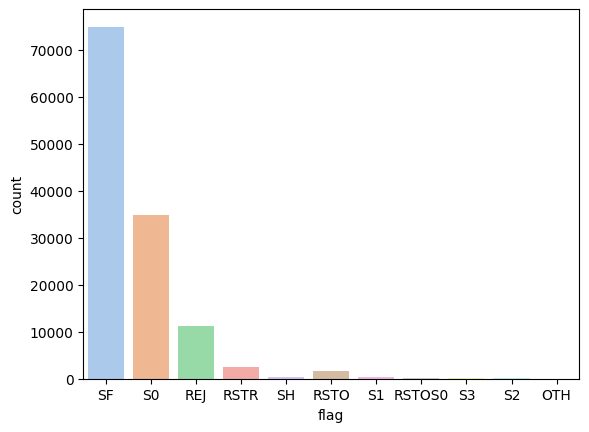

In [ ]:
sns.countplot(x="flag",data=Data,palette="pastel")
plt.show()

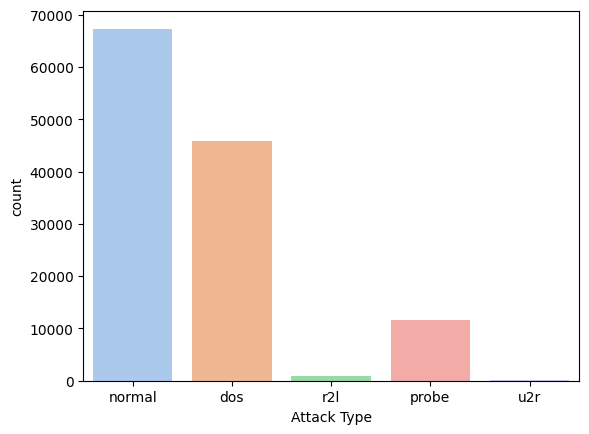

In [ ]:
sns.countplot(x="Attack Type",data=Data,palette="pastel")
plt.show()

We will now see a heatmap that will show us the correlation between each feature , the darker the color the less correlated it is , the whiter it is the more correlated it is.

<ipython-input-20-96a2628517d2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Data.corr()


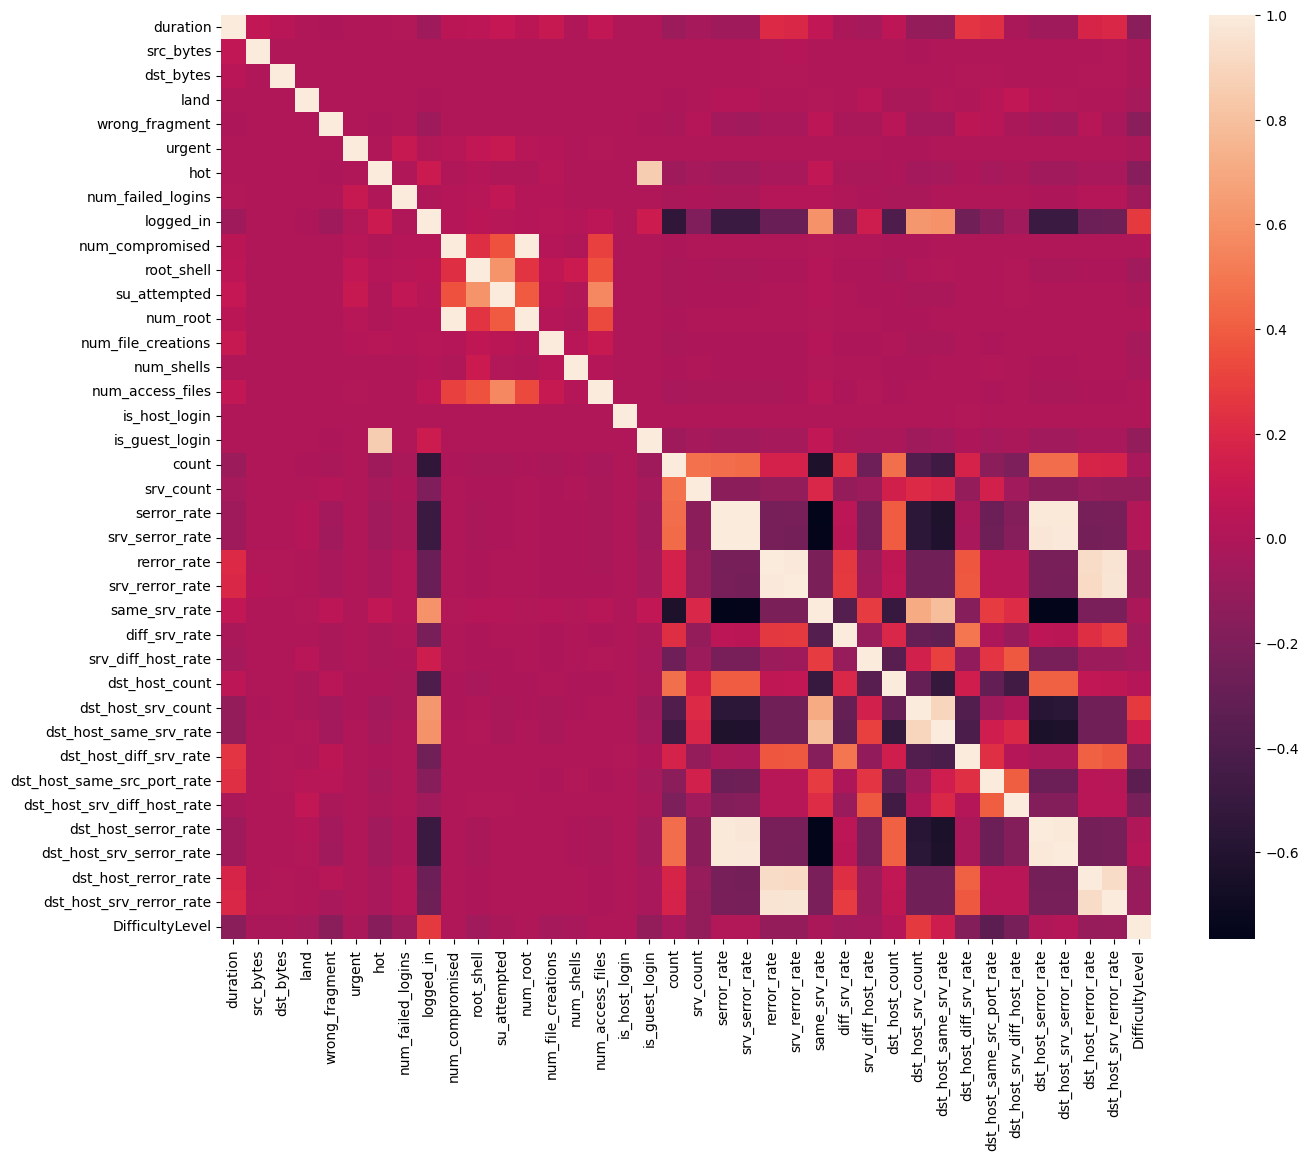

In [ ]:


Data = Data[[col for col in Data if Data[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = Data.corr()

plt.figure(figsize =(15, 12))

sns.heatmap(corr)

plt.show()

# **III-DATA PRE-PROCESSING**

In [ ]:
X_oh=Data.drop(['service','flag'],axis=1)
X_oh.values.reshape(1, -1)

test_oh=test.drop(['service','flag'],axis=1)
test_oh.values.reshape(1,-1)

array([[0, 'tcp', 491, ..., 'neptune', 18, 'dos']], dtype=object)

Now we do the OneHotEnconding for the categorical features

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder



# Assuming 'protocol_type' is a column in your DataFrame
protocol_type = X_oh['protocol_type']
protocol_type_test=test_oh['protocol_type']
# Use LabelEncoder to convert categorical values to numerical labels
label_encoder = LabelEncoder()
encoded_protocol_type = label_encoder.fit_transform(protocol_type)
encoded_test=label_encoder.fit_transform(protocol_type_test)
# Reshape the data to make it 2D
reshaped_protocol_type = encoded_protocol_type.reshape(-1, 1)
reshaped_encoded_test = encoded_test.reshape(-1,1)
# OneHotEncoder
OH = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_X = pd.DataFrame(OH.fit_transform(reshaped_protocol_type), columns=[f'protocol_type_{label}' for label in label_encoder.classes_])
OH_test=pd.DataFrame(OH.fit_transform(reshaped_encoded_test),columns=[f'protocol_type_{label}' for label in label_encoder.classes_])
# Assign the index from the original DataFrame
OH_X.index = X_oh.index
OH_test.index=test_oh.index

# Drop the 'protocol_type' column from the original DataFrame
num_X = X_oh.drop(['protocol_type'], axis=1)
num_test=test_oh.drop(['protocol_type'],axis=1)
# Concatenate the one-hot encoded DataFrame with the remaining numerical features
OH_X = pd.concat([OH_X, num_X], axis=1)
OH_test=pd.concat([OH_test,num_test],axis=1)
print(OH_X.head(),OH_test.head())


   protocol_type_icmp  protocol_type_tcp  protocol_type_udp  duration  \
0                 0.0                1.0                0.0         0   
1                 0.0                0.0                1.0         0   
2                 0.0                1.0                0.0         0   
3                 0.0                1.0                0.0         0   
4                 0.0                1.0                0.0         0   

   src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  ...  \
0        491          0     0               0       0    0  ...   
1        146          0     0               0       0    0  ...   
2          0          0     0               0       0    0  ...   
3        232       8153     0               0       0    0  ...   
4        199        420     0               0       0    0  ...   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Now we do the Standardisation for the numerical features

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#OH_X is your one-hot encoded DataFrame
# Identify non-numeric columns
non_numeric_cols = OH_X.select_dtypes(exclude=['float64', 'int64']).columns
excluded_columns = ['DifficultyLevel']
columns_to_exclude = list(excluded_columns) + list(non_numeric_cols)
# Standardize the numeric data (important for PCA)
numeric_cols = OH_X.columns.difference(columns_to_exclude)

scaler = StandardScaler()
OH_X_standardized = pd.DataFrame(scaler.fit_transform(OH_X[numeric_cols]), columns=numeric_cols)
OH_test_standardized=pd.DataFrame(scaler.fit_transform(OH_test[numeric_cols]),columns=numeric_cols)
OH_X_standardized.head()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment
0,-0.717045,-0.349683,-0.004919,-0.324063,-0.280282,-0.224532,0.069972,-0.782367,-0.639532,-0.818890,...,0.771283,-0.637209,-0.007679,-0.354343,-0.374560,-0.374432,-0.631929,-0.024437,-0.007736,-0.089486
1,-0.620982,0.482201,-0.004919,0.734343,2.736852,-0.387635,2.367737,-1.161030,-0.639532,-1.035688,...,-1.321428,-0.637209,-0.007737,-0.368110,-0.374560,-0.374432,-0.631929,-0.024437,-0.007736,-0.089486
2,0.339648,0.038529,-0.004919,0.734343,-0.174417,-0.387635,-0.480197,-0.938287,1.608759,-0.809857,...,-1.389669,1.602664,-0.007762,-0.299273,-0.374560,-0.374432,1.605104,-0.024437,-0.007736,-0.089486
3,-0.690846,-0.349683,-0.002891,-1.533670,-0.439078,-0.387635,-0.383108,1.066401,-0.572083,1.258754,...,0.771283,-0.189235,-0.007723,-0.313041,-0.374560,-0.374432,-0.184522,-0.024437,-0.007736,-0.089486
4,-0.472521,-0.349683,-0.004814,0.734343,-0.439078,-0.387635,-0.480197,1.066401,-0.639532,1.258754,...,0.771283,-0.637209,-0.007728,0.058678,-0.028179,-0.374432,-0.631929,-0.024437,-0.007736,-0.089486


# **IV. FEATURE SELECTION**

In [ ]:
Data_final = pd.concat([OH_X_standardized, OH_X[columns_to_exclude]], axis=1)
Test_final= pd.concat([OH_test_standardized,OH_test[columns_to_exclude]],axis=1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train= Data_final.drop(columns=['xAttack','Attack Type'], axis=1)
y_train= Data_final['Attack Type']
X_test=Test_final.drop(columns=['xAttack','Attack Type'],axis=1)
y_test=Test_final['Attack Type']





> **For our feature selection we will choose the wrapper method as it yields better result most of the time therefor it is the most suitable choice.**


---



# Wrapper method


We will use the cross validation recursive feature selection

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer,f1_score



In [ ]:
min_features_to_select = 1
rf_classifier = RandomForestClassifier(n_estimators=20)  # You can adjust parameters as needed
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=rf_classifier,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)

rfecv.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 25


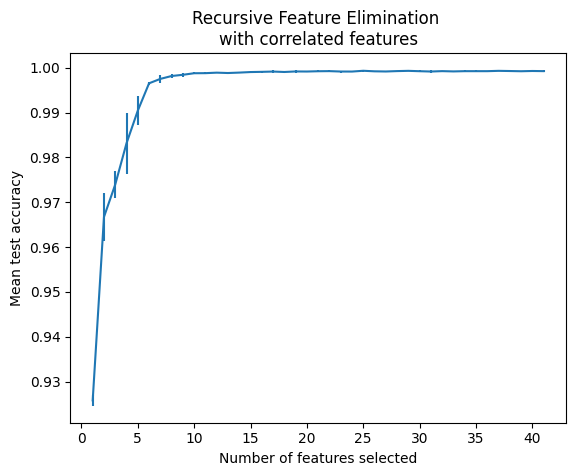

In [ ]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()


In [ ]:
selected_feature_names=rfecv.feature_names_in_
selected_feature_names

array(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_rerror_rate',
       'dst_host_srv_serror_rate', 'duration', 'hot', 'is_guest_login',
       'is_host_login', 'land', 'logged_in', 'num_access_files',
       'num_compromised', 'num_failed_logins', 'num_file_creations',
       'num_root', 'num_shells', 'protocol_type_icmp',
       'protocol_type_tcp', 'protocol_type_udp', 'rerror_rate',
       'root_shell', 'same_srv_rate', 'serror_rate', 'src_bytes',
       'srv_count', 'srv_diff_host_rate', 'srv_rerror_rate',
       'srv_serror_rate', 'su_attempted', 'urgent', 'wrong_fragment',
       'DifficultyLevel'], dtype=object)

In [ ]:
X_train=X_train[selected_feature_names]
X_test=X_test[selected_feature_names]
X_train_wrapper, X_test_wrapper, y_train_wrapper, y_test_wrapper= train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_test.head()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment,DifficultyLevel
0,-0.720244,-0.349282,-0.039310,-0.328634,-0.280673,-0.221668,0.073120,-0.779157,-0.641804,-0.813985,...,-0.640142,-0.009889,-0.354628,-0.373886,-0.373098,-0.633978,-0.027665,-0.006301,-0.091223,20
1,-0.624317,0.490836,-0.039310,0.732059,2.764403,-0.385140,2.375620,-1.157831,-0.641804,-1.030895,...,-0.640142,-0.010032,-0.368427,-0.373886,-0.373098,-0.633978,-0.027665,-0.006301,-0.091223,15
2,0.334947,0.042773,-0.039310,0.732059,-0.173828,-0.385140,-0.478183,-0.935081,1.603834,-0.804947,...,1.595477,-0.010093,-0.299430,-0.373886,-0.373098,1.600209,-0.027665,-0.006301,-0.091223,19
3,-0.694082,-0.349282,0.052473,-1.540854,-0.440940,-0.385140,-0.380894,1.069663,-0.574435,1.264742,...,-0.193018,-0.009996,-0.313230,-0.373886,-0.373098,-0.187141,-0.027665,-0.006301,-0.091223,21
4,-0.476067,-0.349282,-0.034582,0.732059,-0.440940,-0.385140,-0.478183,1.069663,-0.641804,1.264742,...,-0.640142,-0.010010,0.059355,-0.023115,-0.373098,-0.633978,-0.027665,-0.006301,-0.091223,21


# **V-Modeling**

***KNN Classifier***

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

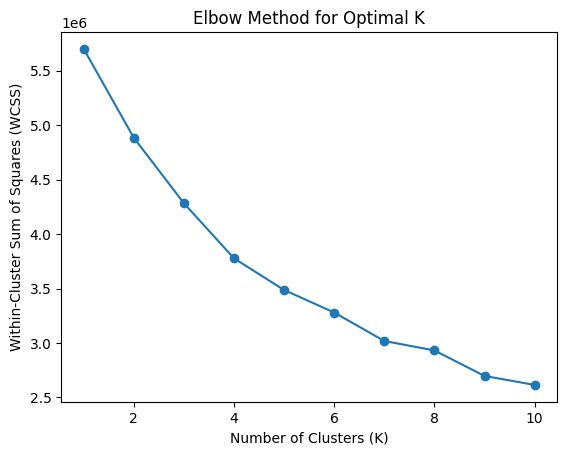

In [ ]:
#KNN
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# Calculate WCSS for different values of K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create a KNN classifier with a specified value of k=4
knn_classifier = KNeighborsClassifier(n_neighbors=4)

# Fit the classifier to the training data
knn_classifier.fit(X_train_wrapper, y_train_wrapper)





KNeighborsClassifier(n_neighbors=4)

In [ ]:
# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9981740234995237
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00      9234
      normal       1.00      1.00      1.00     13449
       probe       0.99      1.00      0.99      2289
         r2l       0.98      0.93      0.96       209
         u2r       0.83      0.45      0.59        11

    accuracy                           1.00     25192
   macro avg       0.96      0.88      0.91     25192
weighted avg       1.00      1.00      1.00     25192



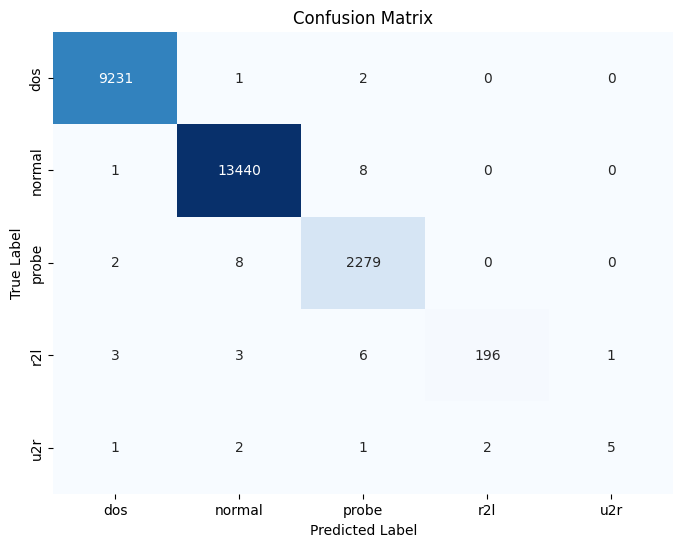

In [ ]:
cm=confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

***Decision tree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


# Create a Decision tree classifier
model_DTC = DecisionTreeClassifier(criterion ="entropy")

# Fit the classifier to the training data
model_DTC.fit(X_train_wrapper, y_train_wrapper)





DecisionTreeClassifier(criterion='entropy')

In [ ]:
# Make predictions on the test data
DTC_pred = model_DTC.predict(X_test)

In [ ]:
print(accuracy_score(y_test, DTC_pred))
print(classification_report(y_test, DTC_pred))

0.9443474118767863
              precision    recall  f1-score   support

         dos       0.98      0.94      0.96      9234
      normal       0.99      0.95      0.97     13449
       probe       0.67      0.97      0.80      2289
         r2l       1.00      0.14      0.24       209
         u2r       0.86      0.55      0.67        11

    accuracy                           0.94     25192
   macro avg       0.90      0.71      0.73     25192
weighted avg       0.96      0.94      0.95     25192



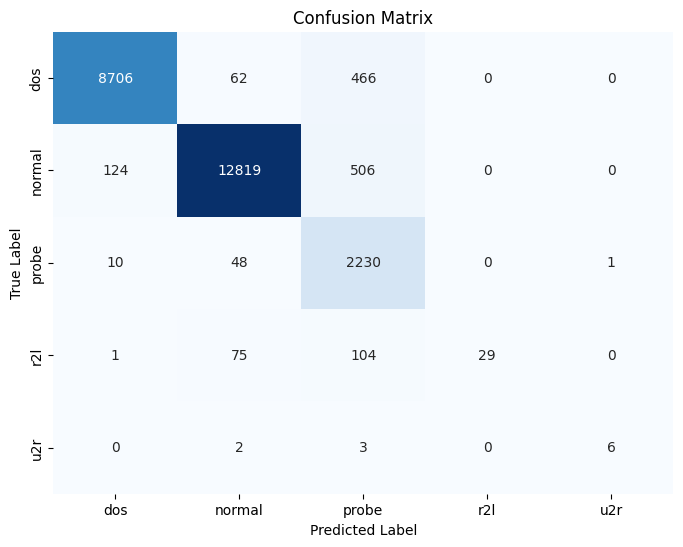

In [ ]:
cm_2=confusion_matrix(y_test, DTC_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_2, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model_DTC.classes_, yticklabels=model_DTC.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

***SVM***

In [ ]:
from sklearn.svm import SVC
# Create an SVM classifier with the 'rbf' kernel
model_SVM = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can adjust the C and gamma parameters

# Fit the classifier to the training data
model_SVM.fit(X_train_wrapper, y_train_wrapper)

# Make predictions on the test set
y_pred_SVM = model_SVM.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred_SVM))
print(classification_report(y_test, y_pred_SVM))

0.9928945697046682
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00      9234
      normal       1.00      0.99      0.99     13449
       probe       0.97      0.99      0.98      2289
         r2l       0.88      0.91      0.90       209
         u2r       1.00      0.45      0.62        11

    accuracy                           0.99     25192
   macro avg       0.97      0.87      0.90     25192
weighted avg       0.99      0.99      0.99     25192



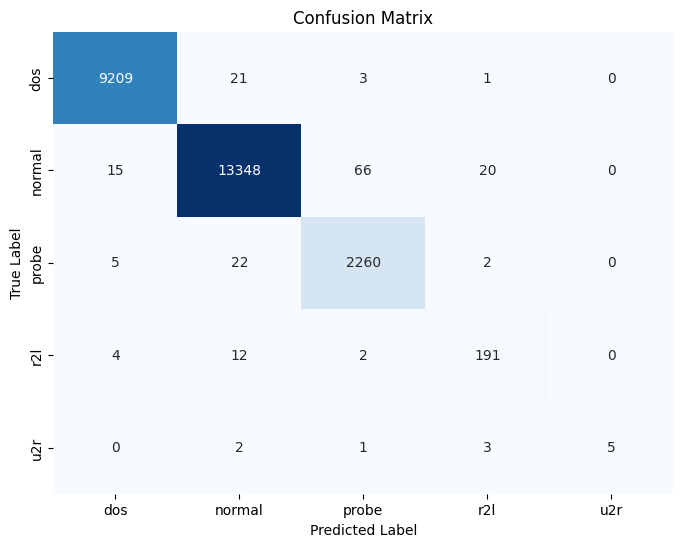

In [ ]:
cm_3=confusion_matrix(y_test, y_pred_SVM)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_3, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model_SVM.classes_, yticklabels=model_SVM.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

***Random Forest Classifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
model_RF = RandomForestClassifier(n_estimators=20, criterion='gini')  # You can adjust the number of estimators and other parameters

# Fit the classifier to the training data
model_RF.fit(X_train_wrapper, y_train_wrapper)
y_pred_RFC=model_RF.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred_RFC))
print(classification_report(y_test, y_pred_RFC))

0.9649094950778024
              precision    recall  f1-score   support

         dos       0.99      0.98      0.98      9234
      normal       0.98      0.96      0.97     13449
       probe       0.81      0.99      0.89      2289
         r2l       0.91      0.15      0.26       209
         u2r       1.00      0.27      0.43        11

    accuracy                           0.96     25192
   macro avg       0.94      0.67      0.71     25192
weighted avg       0.97      0.96      0.96     25192



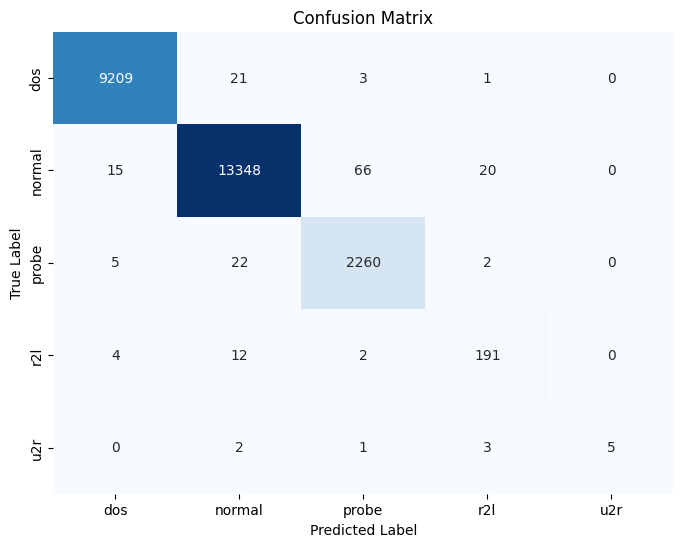

In [ ]:
cm_4=confusion_matrix(y_test, y_pred_RFC)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_3, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model_RF.classes_, yticklabels=model_RF.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

***Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression classifier for multi-class classification
model_LR_multi = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr', max_iter=1000)

# Fit the classifier to the training data
model_LR_multi.fit(X_train_wrapper, y_train_wrapper)

# Make predictions on the test set
y_pred_multi = model_LR_multi.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred_multi))
print(classification_report(y_test, y_pred_multi))

0.9808669418863131
              precision    recall  f1-score   support

         dos       0.99      0.99      0.99      9234
      normal       0.99      0.98      0.98     13449
       probe       0.93      0.93      0.93      2289
         r2l       0.91      0.89      0.90       209
         u2r       1.00      0.55      0.71        11

    accuracy                           0.98     25192
   macro avg       0.96      0.87      0.90     25192
weighted avg       0.98      0.98      0.98     25192



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression

# Binarisez les étiquettes pour l'ensemble de test
class_labels = ["dos", "normal", "probe", "r2l", "u2r"]
y_test_bin = label_binarize(y_test, classes=class_labels)

# Création du modèle de régression logistique
model = LogisticRegression()

# Entraînement du modèle sur l'ensemble d'entraînement
model.fit(X_train_wrapper, y_train_wrapper)

# Obtenez les scores de probabilité pour chaque classe sur l'ensemble de test
y_score = model.predict_proba(X_test)

# Calculez les courbes ROC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Affichage des courbes ROC pour chaque classe
plt.figure(figsize=(10, 6))

for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class {class_labels[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()

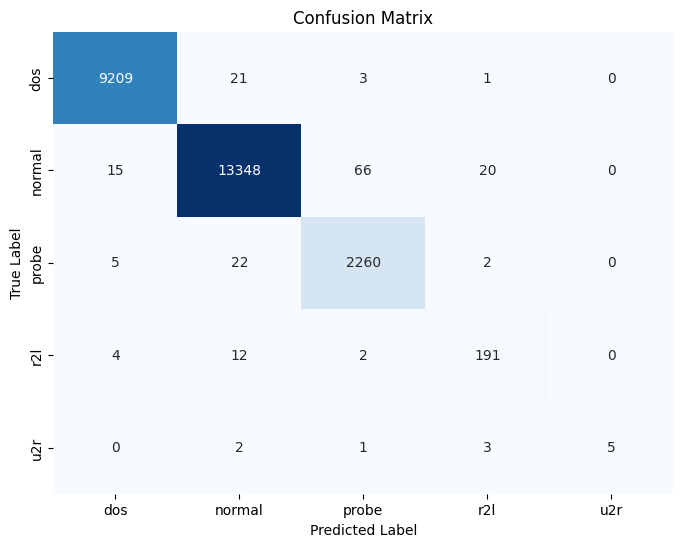

In [ ]:
cm_5=confusion_matrix(y_test, y_pred_multi)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_3, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model_LR_multi.classes_, yticklabels=model_LR_multi.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

*Evaluation*

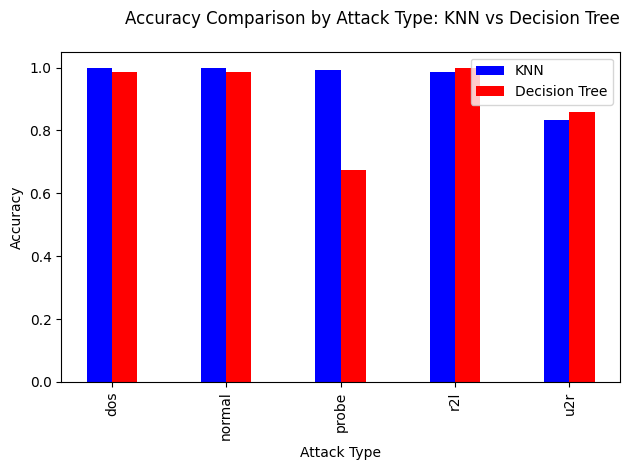

In [ ]:
# Assuming you have the classification reports from your models
knn_classification_report = classification_report(y_test, y_pred, output_dict=True)
dt_classification_report = classification_report(y_test, DTC_pred, output_dict=True)

# Extract precision, recall, and f1-score for each attack type
attack_types = list(knn_classification_report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

knn_accuracies = [knn_classification_report[attack_type]['precision'] for attack_type in attack_types]
dt_accuracies = [dt_classification_report[attack_type]['precision'] for attack_type in attack_types]

# Bar width
bar_width = 0.22

# Set up positions for bars
index = np.arange(len(attack_types))

# Create subplots with custom layout
fig, ax = plt.subplots()
ax.bar(index, knn_accuracies, width=bar_width, label='KNN', color='blue')
ax.bar(index + bar_width, dt_accuracies, width=bar_width, label='Decision Tree', color='red')

# Add labels and title
ax.set_xlabel('Attack Type')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison by Attack Type: KNN vs Decision Tree', loc='right', pad=20)  # loc='right' places the title on the right
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(attack_types, rotation='vertical')
ax.legend()



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

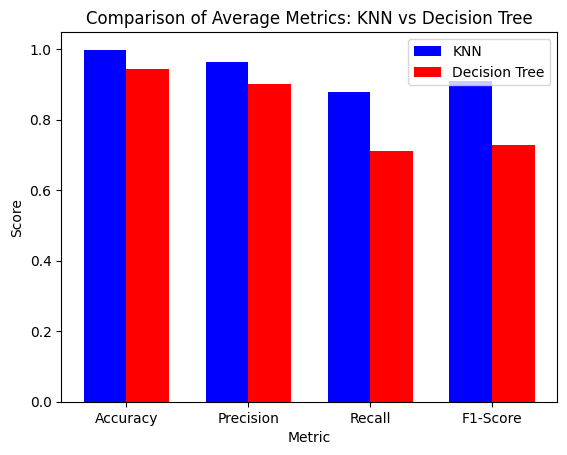

In [ ]:
# Extract overall metrics
knn_metrics = [knn_classification_report['accuracy'], knn_classification_report['macro avg']['precision'],
               knn_classification_report['macro avg']['recall'], knn_classification_report['macro avg']['f1-score']]

dt_metrics = [dt_classification_report['accuracy'], dt_classification_report['macro avg']['precision'],
              dt_classification_report['macro avg']['recall'], dt_classification_report['macro avg']['f1-score']]

# Metrics names
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Bar width
bar_width = 0.35

# Set up positions for bars
index = np.arange(len(metric_names))

# Create subplots with custom layout
fig, ax = plt.subplots()

# Create grouped bar plot
ax.bar(index - bar_width / 2, knn_metrics, width=bar_width, label='KNN', color='blue')
ax.bar(index + bar_width / 2, dt_metrics, width=bar_width, label='Decision Tree', color='red')

# Add labels and title
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Comparison of Average Metrics: KNN vs Decision Tree')
ax.set_xticks(index)
ax.set_xticklabels(metric_names)
ax.legend()

# Show the plot
plt.show()